# How to measure crosstalk with FACT

In our [Performance paper](http://iopscience.iop.org/article/10.1088/1748-0221/9/10/P10012/meta) we nicely describe that the multiplicity distribution which is actually measured can be nicely fit with this distribution, which is called "modified Erlang distribution". 

$ P_N(q, \nu) = \frac{(Nq)^{N-1}}{[(N-1)!]^{\nu}} $

We should note that this modification parameter $\nu$ turns out to be really close to 1, in figure 3 it looks like it is even compatible with 1, in table 4 the value $ \nu = 0.93715 \approx 0.94$ is given, without uncertainties.

Also it should be noted that this distribution is not nicely normalized, so $\sum P_N \neq 1$! Let us call this normalization $S_{q\nu}$ and redefine $P_N$ like this:

$ P_N(q, \nu) = \frac{1}{S_{q\nu}} \cdot \frac{(Nq)^{N-1}}{[(N-1)!]^{\nu}} $

So that now $\sum P_N = 1$!

Now the **definition** of the crosstalk probability $p_{xt}$ from the paper transforms into:

$ p_{xt}(q, \nu) = \sum_{n=2}^{\infty} P_n(q, \nu) $

## Without crosstalk

Now let us switch off crosstalk for a moment and look at our sensor. We can model accidental avalanches as a simple poissonian process now. So without crosstalk the probability $Q$ to observe a certain multiplicity N can be written as:

$ Q_N(\lambda) = \frac{\lambda^{(N-1)}}{(N-1)!} e^{-\lambda} $

The term N-1 comes from the fact, that we always see at least one avalanche with our measurement method, This distribution is nicely normalized, i.e. $\sum_{n=1}^{\infty} Q_n = 1$.

So if we apply our definition of the crosstalk $p_{xt}$ to this distribution, we can directly see:

$ p_{xt}(\lambda) = \sum_{n=2}^{\infty} Q_n(\lambda) = \sum_{n=1}^{\infty} Q_n - Q_1 = 1 - e^{-\lambda} \approx \lambda$

This shows, that using our definition of the crosstalk $p_{xt}$, must result in a non-zero crosstalk measurement which is depending on the expectation value of an accidental discharge $\lambda$ even when there is no crosstalk at all.


We can play with this a bit, to better understand it ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$\lambda$ is the expectation value for an (accidental) discharge in a certain (time) window. For the time window let us take 5ns. Why 5ns? Well, we after a rising edge we integrate for 15ns, and I assume if another cell discharges close to the 

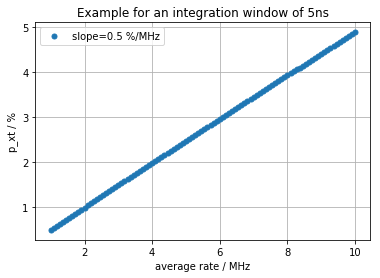

In [2]:
rate = np.linspace(1e6, 10e6, 100)
integration_window = 5e-9

slope, offset = np.polyfit(
    rate / 1e6, 
    (1 - np.exp(-rate * integration_window)) * 100,
    deg = 1
)

plt.plot(
    rate / 1e6, 
    (1 - np.exp(-rate * integration_window)) * 100,
    '.',
    ms=10,
    label="slope={0:.1f} %/MHz".format(slope)
)

plt.xlabel('average rate / MHz')
plt.ylabel('p_xt / %')
plt.legend()
plt.grid()
plt.title('Example for an integration window of 5ns');

So one might be tempted to say, this defintion for a crosstalk probability $p_{xt}$ is maybe not useful, since it creates a non-zero crosstalk probability even when there is no crosstalk.

So we wondered if there is an alternative definition of crosstalk which maybe does not show this particular behaviour.